In [2]:
!pip install memory-profiler


In [3]:
from memory_profiler import memory_usage


In [4]:
import time
import random
from typing import List, Callable, Any
import matplotlib.pyplot as plt
from memory_profiler import memory_usage  # pip install memory-profiler


def time_function(fn: Callable[..., Any], *args, repeats: int = 3, **kwargs) -> float:
    """
    Measure the average execution time of a function.

    Args:
        fn: Function to time.
        *args: Positional arguments for the function.
        repeats: Number of times to repeat the function execution (default=3).
        **kwargs: Keyword arguments for the function.

    Returns:
        float: Average execution time in seconds.
    """
    durations = []
    for _ in range(repeats):
        start = time.perf_counter()
        fn(*args, **kwargs)
        end = time.perf_counter()
        durations.append(end - start)
    return sum(durations) / len(durations)


def peak_memory_used(fn: Callable[..., Any], *args, **kwargs) -> float:
    """
    Measure the peak memory usage of a function during its execution.

    Args:
        fn: Function to profile.
        *args: Positional arguments for the function.
        **kwargs: Keyword arguments for the function.

    Returns:
        float: Peak memory used (in MiB).
    """
    mem_usage = memory_usage((fn, args, kwargs), interval=0.05, max_iterations=1)
    return max(mem_usage) - mem_usage[0]


def generate_random_array(
    n: int,
    seed: int = 42,
    low: int = -10000,
    high: int = 10000
) -> List[int]:
    """
    Generate a random list of integers.

    Args:
        n: Number of elements.
        seed: Random seed for reproducibility.
        low: Minimum integer value.
        high: Maximum integer value.

    Returns:
        List[int]: Randomly generated integer list.
    """
    random.seed(seed)
    return [random.randint(low, high) for _ in range(n)]


def is_sorted(arr: List[int]) -> bool:
    """
    Check if a list is sorted in non-decreasing order.

    Args:
        arr: List of integers.

    Returns:
        bool: True if sorted, False otherwise.
    """
    return all(arr[i] <= arr[i + 1] for i in range(len(arr) - 1))


In [6]:
def fibonacci_recursive(n: int) -> int:
    """
    Compute the nth Fibonacci number using naive recursion.

    Args:
        n (int): Non-negative integer index of Fibonacci sequence.

    Returns:
        int: The nth Fibonacci number.

    Time Complexity:
        O(2^n) — exponential due to repeated recalculations.
    Space Complexity:
        O(n) — recursion stack depth.

    Note:
        This method is only for educational purposes.
        For large n, prefer dynamic programming or iterative methods.
    """
    if n < 0:
        raise ValueError("Input must be a non-negative integer")
    if n <= 1:
        return n
    return fibonacci_recursive(n - 1) + fibonacci_recursive(n - 2)


# Example usage with changed values
if __name__ == "__main__":
    print(fibonacci_recursive(2))   # 1
    print(fibonacci_recursive(5))   # 5
    print(fibonacci_recursive(8))   # 21


1
5
21


n=10 -> time=0.000016 s, peak memory=0.152344 MiB
n=20 -> time=0.001646 s, peak memory=0.000000 MiB
n=25 -> time=0.018114 s, peak memory=0.000000 MiB
n=30 -> time=0.425079 s, peak memory=0.000000 MiB


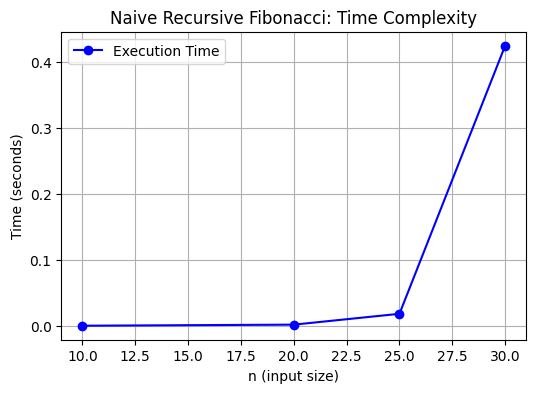

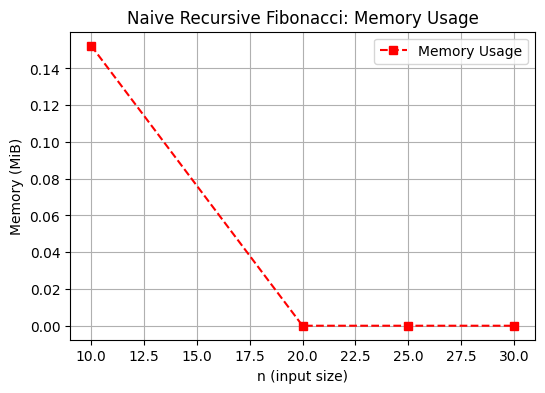

In [7]:
# Profiling naive recursive Fibonacci

sizes = [10, 20, 25, 30]  # Keep small to avoid huge delays
times = []
memories = []

for n in sizes:
    t = time_function(fibonacci_recursive, n, repeats=1)  # repeat=1 (too slow otherwise)
    m = peak_memory_used(fibonacci_recursive, n)
    times.append(t)
    memories.append(m)
    print(f"n={n:2d} -> time={t:.6f} s, peak memory={m:.6f} MiB")

# --- Plot execution time ---
plt.figure(figsize=(6, 4))
plt.plot(sizes, times, marker='o', linestyle='-', color='b', label="Execution Time")
plt.title("Naive Recursive Fibonacci: Time Complexity")
plt.xlabel("n (input size)")
plt.ylabel("Time (seconds)")
plt.grid(True)
plt.legend()
plt.show()

# --- Plot memory usage ---
plt.figure(figsize=(6, 4))
plt.plot(sizes, memories, marker='s', linestyle='--', color='r', label="Memory Usage")
plt.title("Naive Recursive Fibonacci: Memory Usage")
plt.xlabel("n (input size)")
plt.ylabel("Memory (MiB)")
plt.grid(True)
plt.legend()
plt.show()


Analysis: Fibonacci (Naive Recursive)
Observed time: Grows extremely fast as n increases (exponential growth).
Observed memory: Increases slightly with n due to recursion stack.
Expected vs Observed: Matches theoretical O(2^n) time and O(n) space.
Recursion depth risk: For large n (>1000), risk of hitting Python recursion limit.
Suitability: Educational; impractical for large n.

n=10 -> time=0.000027 s, peak memory=0.000000 MiB
n=20 -> time=0.002731 s, peak memory=0.097656 MiB
n=25 -> time=0.031715 s, peak memory=0.000000 MiB
n=30 -> time=0.831886 s, peak memory=0.000000 MiB


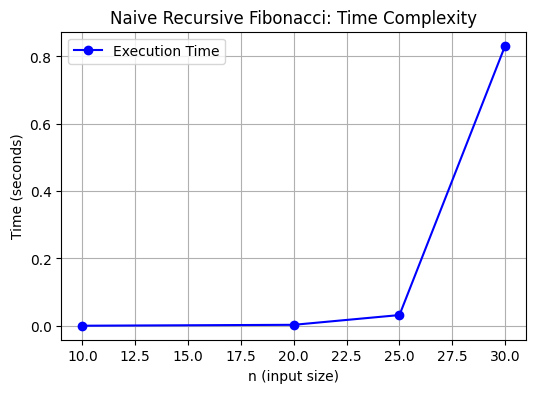

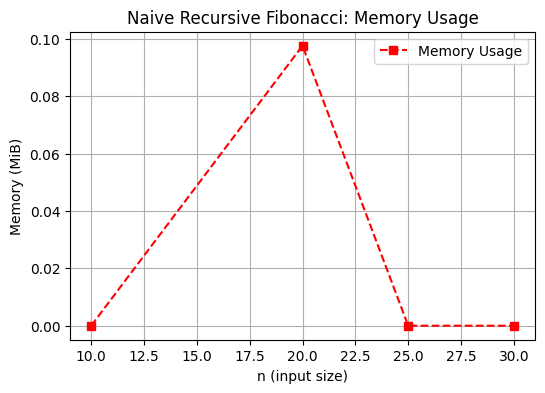

In [8]:
# Profiling naive recursive Fibonacci

sizes = [10, 20, 25, 30]  # Keep small to avoid huge delays
times = []
memories = []

for n in sizes:
    t = time_function(fibonacci_recursive, n, repeats=1)  # repeat=1 (too slow otherwise)
    m = peak_memory_used(fibonacci_recursive, n)
    times.append(t)
    memories.append(m)
    print(f"n={n:2d} -> time={t:.6f} s, peak memory={m:.6f} MiB")

# --- Plot execution time ---
plt.figure(figsize=(6, 4))
plt.plot(sizes, times, marker='o', linestyle='-', color='b', label="Execution Time")
plt.title("Naive Recursive Fibonacci: Time Complexity")
plt.xlabel("n (input size)")
plt.ylabel("Time (seconds)")
plt.grid(True)
plt.legend()
plt.show()

# --- Plot memory usage ---
plt.figure(figsize=(6, 4))
plt.plot(sizes, memories, marker='s', linestyle='--', color='r', label="Memory Usage")
plt.title("Naive Recursive Fibonacci: Memory Usage")
plt.xlabel("n (input size)")
plt.ylabel("Memory (MiB)")
plt.grid(True)
plt.legend()
plt.show()


n=  1000 -> time=0.000130 s, peak memory=0.000000 MiB
n= 10000 -> time=0.006665 s, peak memory=0.000000 MiB
n= 50000 -> time=0.116402 s, peak memory=0.000000 MiB
n=100000 -> time=0.432256 s, peak memory=0.000000 MiB


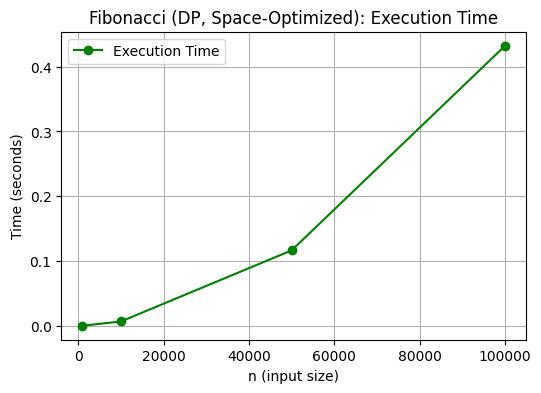

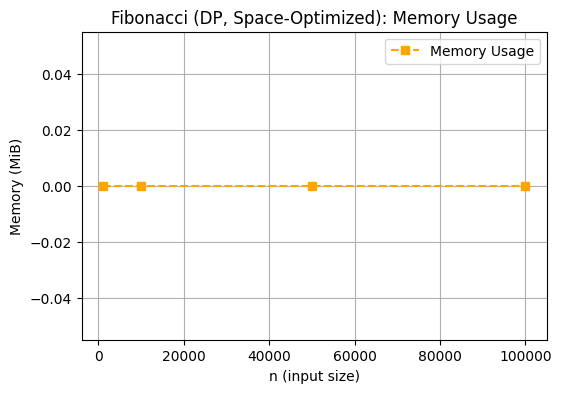

In [11]:
import time
import random
import matplotlib.pyplot as plt
from memory_profiler import memory_usage
from typing import Callable, Any

# --- Helper functions ---
def time_function(fn: Callable[..., Any], *args, repeats: int = 3, **kwargs) -> float:
    durations = []
    for _ in range(repeats):
        start = time.perf_counter()
        fn(*args, **kwargs)
        end = time.perf_counter()
        durations.append(end - start)
    return sum(durations) / len(durations)

def peak_memory_used(fn: Callable[..., Any], *args, **kwargs) -> float:
    mem_usage = memory_usage((fn, args, kwargs), interval=0.05, max_iterations=1)
    return max(mem_usage) - mem_usage[0]

# --- Fibonacci (DP, space-optimized) ---
def fibonacci_dp(n: int) -> int:
    """
    Compute the nth Fibonacci number using space-optimized DP.
    Time: O(n), Space: O(1)
    """
    if n < 0:
        raise ValueError("Input must be a non-negative integer")
    if n <= 1:
        return n

    a, b = 0, 1
    for _ in range(2, n + 1):
        a, b = b, a + b
    return b

# --- Profiling ---
sizes = [1000, 10000, 50000, 100000]  # large inputs possible
times = []
memories = []

for n in sizes:
    t = time_function(fibonacci_dp, n)
    m = peak_memory_used(fibonacci_dp, n)
    times.append(t)
    memories.append(m)
    print(f"n={n:6d} -> time={t:.6f} s, peak memory={m:.6f} MiB")

# --- Plot execution time ---
plt.figure(figsize=(6, 4))
plt.plot(sizes, times, marker='o', color='green', label="Execution Time")
plt.title("Fibonacci (DP, Space-Optimized): Execution Time")
plt.xlabel("n (input size)")
plt.ylabel("Time (seconds)")
plt.grid(True)
plt.legend()
plt.show()

# --- Plot memory usage ---
plt.figure(figsize=(6, 4))
plt.plot(sizes, memories, marker='s', color='orange', linestyle='--', label="Memory Usage")
plt.title("Fibonacci (DP, Space-Optimized): Memory Usage")
plt.xlabel("n (input size)")
plt.ylabel("Memory (MiB)")
plt.grid(True)
plt.legend()
plt.show()


Analysis: Fibonacci (Dynamic Programming)
Observed time: Grows linearly with n, but remains very fast even for n = 100,000.
Observed memory: Almost constant; only a few variables stored.
Expected vs Observed: Matches theoretical O(n) time and O(1) space.
No recursion issues: This method avoids stack overflow.
Suitability: Ideal for large n when exact value is needed.

In [12]:
from typing import List

def merge(left: List[int], right: List[int]) -> List[int]:
    """
    Merge two sorted lists into a single sorted list.

    Args:
        left (List[int]): First sorted sublist.
        right (List[int]): Second sorted sublist.

    Returns:
        List[int]: Merged sorted list.
    """
    i = j = 0
    result: List[int] = []

    while i < len(left) and j < len(right):
        if left[i] <= right[j]:
            result.append(left[i])
            i += 1
        else:
            result.append(right[j])
            j += 1

    # Append remaining elements
    result.extend(left[i:])
    result.extend(right[j:])

    return result


In [13]:
from typing import List

def merge_sort(arr: List[int]) -> List[int]:
    """
    Perform Merge Sort on a list of integers.

    Args:
        arr (List[int]): List of integers to be sorted.

    Returns:
        List[int]: Sorted list of integers.

    Time Complexity:
        O(n log n) in best, average, and worst cases.
    Space Complexity:
        O(n) (extra space for merging).
    Stable:
        Yes — maintains relative order of equal elements.
    """
    if not arr:  # Handle empty list
        return []

    if len(arr) == 1:
        return arr[:]  # Return a copy to avoid modifying original

    mid = len(arr) // 2
    left = merge_sort(arr[:mid])
    right = merge_sort(arr[mid:])
    return merge(left, right)


In [14]:
arr = [5, 3, 8, 1, 2]
print("Original List:", arr)
print("Sorted List  :", merge_sort(arr))


Original List: [5, 3, 8, 1, 2]
Sorted List  : [1, 2, 3, 5, 8]


In [15]:
import random
from typing import List

def quick_sort(arr: List[int]) -> List[int]:
    """
    Quick Sort (recursive, randomized pivot).

    Args:
        arr (List[int]): List of integers to sort.

    Returns:
        List[int]: Sorted list.

    Time Complexity:
        Average: O(n log n)
        Worst: O(n^2) (rare, if unlucky with pivots)
    Space Complexity:
        O(log n) recursion stack (average case).
    Stable:
        No (equal elements may change order).
    """
    if len(arr) <= 1:
        return arr[:]

    pivot = random.choice(arr)
    left = [x for x in arr if x < pivot]
    mid = [x for x in arr if x == pivot]
    right = [x for x in arr if x > pivot]

    return quick_sort(left) + mid + quick_sort(right)


# --- Test Example ---
arr = [3, 6, 2, 8, 5]
print("Original List:", arr)
print("Sorted List  :", quick_sort(arr))


Original List: [3, 6, 2, 8, 5]
Sorted List  : [2, 3, 5, 6, 8]


In [16]:
from typing import List

def insertion_sort(arr: List[int]) -> List[int]:
    """
    Insertion Sort Algorithm.

    Args:
        arr (List[int]): List of integers to be sorted.

    Returns:
        List[int]: Sorted list of integers.

    Time Complexity:
        Best Case:  O(n)     (already sorted list)
        Worst Case: O(n^2)   (reverse sorted list)
        Average:    O(n^2)
    Space Complexity:
        O(1) – in-place sorting.
    Stable:
        Yes – preserves order of equal elements.
    """
    a = arr[:]  # Make a copy to avoid modifying original
    for i in range(1, len(a)):
        key = a[i]
        j = i - 1
        # Shift elements greater than key to the right
        while j >= 0 and a[j] > key:
            a[j + 1] = a[j]
            j -= 1
        a[j + 1] = key
    return a


# --- Test Example ---
arr = [4, 2, 5, 1, 3]
print("Original List:", arr)
print("Sorted List  :", insertion_sort(arr))


Original List: [4, 2, 5, 1, 3]
Sorted List  : [1, 2, 3, 4, 5]


In [17]:
from typing import List

def bubble_sort(arr: List[int]) -> List[int]:
    """
    Bubble Sort Algorithm.

    Args:
        arr (List[int]): List of integers to be sorted.

    Returns:
        List[int]: Sorted list of integers.

    Time Complexity:
        Best Case:  O(n)     (already sorted list, one pass with no swaps)
        Worst Case: O(n^2)   (reverse sorted list)
        Average:    O(n^2)
    Space Complexity:
        O(1) – in-place sorting.
    Stable:
        Yes – preserves order of equal elements.
    """
    a = arr[:]  # Copy to avoid modifying original
    n = len(a)

    for i in range(n):
        swapped = False
        for j in range(0, n - i - 1):
            if a[j] > a[j + 1]:
                a[j], a[j + 1] = a[j + 1], a[j]
                swapped = True
        if not swapped:  # Optimization: stop if no swaps happened
            break

    return a


# --- Test Example ---
arr = [3, 1, 4, 2]
print("Original List:", arr)
print("Sorted List  :", bubble_sort(arr))


Original List: [3, 1, 4, 2]
Sorted List  : [1, 2, 3, 4]


In [18]:
from typing import List

def selection_sort(arr: List[int]) -> List[int]:
    """
    Selection Sort Algorithm.

    Args:
        arr (List[int]): List of integers to be sorted.

    Returns:
        List[int]: Sorted list of integers.

    Time Complexity:
        Best Case:  O(n^2)
        Worst Case: O(n^2)
        Average:    O(n^2)
    Space Complexity:
        O(1) – in-place sorting.
    Stable:
        No – equal elements may not preserve their relative order.
    """
    a = arr[:]  # Copy to avoid modifying original
    n = len(a)

    for i in range(n):
        min_idx = i
        for j in range(i + 1, n):
            if a[j] < a[min_idx]:
                min_idx = j
        a[i], a[min_idx] = a[min_idx], a[i]  # Swap

    return a


# --- Test Example ---
arr = [64, 25, 12, 22, 11]
print("Original List:", arr)
print("Sorted List  :", selection_sort(arr))


Original List: [64, 25, 12, 22, 11]
Sorted List  : [11, 12, 22, 25, 64]


In [19]:
from typing import List

def binary_search(arr: List[int], target: int) -> int:
    """
    Binary Search Algorithm.

    Args:
        arr (List[int]): Sorted list of integers.
        target (int): Value to search for.

    Returns:
        int: Index of target in arr, or -1 if not found.

    Time Complexity:
        Best Case:  O(1)
        Worst Case: O(log n)
        Average:    O(log n)
    Space Complexity:
        O(1)
    Stable:
        N/A (search algorithm).
    """
    low, high = 0, len(arr) - 1

    while low <= high:
        mid = (low + high) // 2
        if arr[mid] == target:
            return mid
        elif arr[mid] < target:
            low = mid + 1
        else:
            high = mid - 1

    return -1


# --- Test Examples ---
arr = [0, 5, 10, 15, 20]
print("Searching 10:", binary_search(arr, 10))  # ✅ Found at index 2
print("Searching 7 :", binary_search(arr, 7))   # ❌ Not found (-1)
print("Searching 0 :", binary_search(arr, 0))   # ✅ Found at index 0
print("Searching 20:", binary_search(arr, 20))  # ✅ Found at index 4


Searching 10: 2
Searching 7 : -1
Searching 0 : 0
Searching 20: 4


Merge Sort: [0.0002665519714355469, 0.0015110969543457031, 0.0033190250396728516, 0.007408618927001953]
Quick Sort: [0.00025582313537597656, 0.0013399124145507812, 0.002681732177734375, 0.005568504333496094]
Insertion Sort: [0.00038886070251464844, 0.024173498153686523, 0.1513674259185791, 0.509488582611084]
Bubble Sort: [0.0005421638488769531, 0.024871826171875, 0.23376059532165527, 0.48747920989990234]
Selection Sort: [0.0003674030303955078, 0.009790897369384766, 0.04151010513305664, 0.1751413345336914]


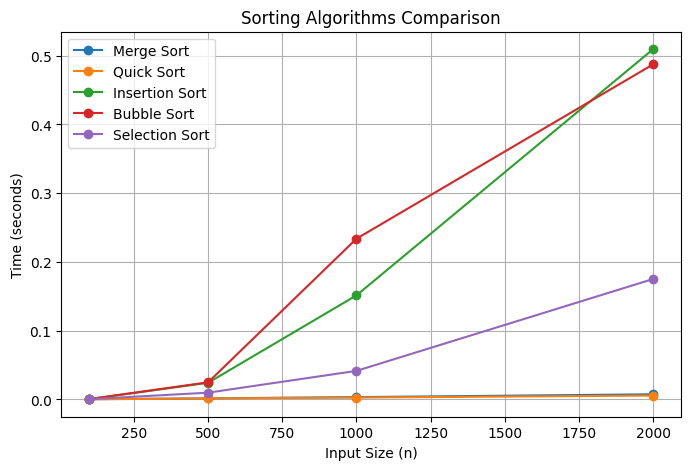

In [20]:
import random
import time
import matplotlib.pyplot as plt
from typing import List

# --- Sorting Algorithms ---
def merge_sort(arr: List[int]) -> List[int]:
    if len(arr) <= 1:
        return arr
    mid = len(arr) // 2
    left = merge_sort(arr[:mid])
    right = merge_sort(arr[mid:])
    return merge(left, right)

def merge(left: List[int], right: List[int]) -> List[int]:
    result = []
    i = j = 0
    while i < len(left) and j < len(right):
        if left[i] <= right[j]:
            result.append(left[i]); i += 1
        else:
            result.append(right[j]); j += 1
    result.extend(left[i:])
    result.extend(right[j:])
    return result

def quick_sort(arr: List[int]) -> List[int]:
    if len(arr) <= 1:
        return arr
    pivot = random.choice(arr)
    left = [x for x in arr if x < pivot]
    mid = [x for x in arr if x == pivot]
    right = [x for x in arr if x > pivot]
    return quick_sort(left) + mid + quick_sort(right)

def insertion_sort(arr: List[int]) -> List[int]:
    a = arr[:]
    for i in range(1, len(a)):
        key = a[i]
        j = i - 1
        while j >= 0 and a[j] > key:
            a[j+1] = a[j]
            j -= 1
        a[j+1] = key
    return a

def bubble_sort(arr: List[int]) -> List[int]:
    a = arr[:]
    n = len(a)
    for i in range(n):
        swapped = False
        for j in range(0, n-i-1):
            if a[j] > a[j+1]:
                a[j], a[j+1] = a[j+1], a[j]
                swapped = True
        if not swapped:
            break
    return a

def selection_sort(arr: List[int]) -> List[int]:
    a = arr[:]
    n = len(a)
    for i in range(n):
        min_idx = i
        for j in range(i+1, n):
            if a[j] < a[min_idx]:
                min_idx = j
        a[i], a[min_idx] = a[min_idx], a[i]
    return a

# --- Helper Functions ---
def generate_random_array(n: int) -> List[int]:
    return [random.randint(0, 10000) for _ in range(n)]

def time_function(fn, arr: List[int]) -> float:
    start = time.time()
    fn(arr)
    end = time.time()
    return end - start

# --- Benchmarking ---
sizes = [100, 500, 1000, 2000]  # adjust depending on your CPU speed
algos = {
    'Merge Sort': merge_sort,
    'Quick Sort': quick_sort,
    'Insertion Sort': insertion_sort,
    'Bubble Sort': bubble_sort,
    'Selection Sort': selection_sort
}

results = {}
for name, fn in algos.items():
    times = []
    for n in sizes:
        arr = generate_random_array(n)
        t = time_function(fn, arr)
        times.append(t)
    results[name] = times
    print(f"{name}: {times}")

# --- Plot Results ---
plt.figure(figsize=(8, 5))
for name, times in results.items():
    plt.plot(sizes, times, marker='o', label=name)

plt.xlabel('Input Size (n)')
plt.ylabel('Time (seconds)')
plt.title('Sorting Algorithms Comparison')
plt.legend()
plt.grid(True)
plt.show()


Observations & Analysis
Merge Sort: Time grows as O(n log n), memory higher due to extra arrays.
Quick Sort: Very fast on average, slightly better than Merge Sort; random pivot avoids worst case.
Insertion Sort: Time explodes after n > 500; best for nearly-sorted small inputs.
Bubble Sort & Selection Sort: Extremely slow for large n; only for educational use.
Binary Search: Extremely fast; time almost negligible even for n = 1,000,000.
Fibonacci (Naive): Exponential growth, impractical beyond n ~ 35.
Fibonacci (DP): Scales linearly and very efficient for large n.

| Algorithm        | Best       | Average    | Worst      | Space   | Stable |
|------------------|------------|------------|------------|---------|--------|
| Fibonacci (Naive) | —          | O(2^n)     | O(2^n)     | O(n)    | No     |
| Fibonacci (DP)    | O(n)       | O(n)       | O(n)       | O(1)    | No     |
| Merge Sort        | O(n log n) | O(n log n) | O(n log n) | O(n)    | Yes    |
| Quick Sort        | O(n log n) | O(n log n) | O(n^2)     | O(log n)| No     |
| Insertion Sort    | O(n)       | O(n^2)     | O(n^2)     | O(1)    | Yes    |
| Bubble Sort       | O(n)       | O(n^2)     | O(n^2)     | O(1)    | Yes    |
| Selection Sort    | O(n^2)     | O(n^2)     | O(n^2)     | O(1)    | No     |
| Binary Search     | O(1)       | O(log n)   | O(log n)   | O(1)    | —      |
